In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import matplotlib.cm as cm

In [3]:
df=pd.read_csv('SuumoTokyoShaped20221018.csv')

In [4]:
df.head()

,カテゴリ,建物名,経度,緯度,都道府県,市区町村,市区町村以下,経度(区),緯度(区),路線,...,地下,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,url
0,賃貸アパート,プチ・ボヌール,139.726883,35.554230,東京都,大田区,南蒲田３,139.716293,35.561337,京急空港線,...,0,2,2.0,14.8,5000,14.8,14.8,42DK,48.87,https://suumo.jp/chintai/jnc_000046696863/?bc=...
1,賃貸一戸建て,荒川戸建,139.783234,35.737568,東京都,荒川区,荒川２,139.783615,35.735130,東京メトロ千代田線,...,0,3,3.0,19.5,0,39.0,19.5,3SLDK,97.95,https://suumo.jp/chintai/jnc_000076009318/?bc=...
2,賃貸一戸建て,荒川戸建,139.783234,35.737568,東京都,荒川区,荒川２,139.783615,35.735130,東京メトロ千代田線,...,0,3,3.0,19.5,0,39.0,19.5,3SLDK,97.95,https://suumo.jp/chintai/jnc_000076047600/?bc=...
3,賃貸マンション,ティモーネ上野の森ノース,139.780899,35.726601,東京都,荒川区,東日暮里４,139.783615,35.735130,ＪＲ山手線,...,0,11,2.0,15.2,10000,15.2,15.2,2LDK,52.04,https://suumo.jp/chintai/jnc_000077318759/?bc=...
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,139.795654,35.733616,東京都,荒川区,南千住５,139.783615,35.735130,東京メトロ日比谷線,...,0,3,3.0,11.3,2000,11.3,11.3,1LDK,43.81,https://suumo.jp/chintai/jnc_000077330023/?bc=...


In [10]:
df.shape

(156943, 28)

In [5]:
df.columns

Index(['カテゴリ', '建物名', '経度', '緯度', '都道府県', '市区町村', '市区町村以下', '経度(区)', '緯度(区)',
       '路線', '駅', '経度(駅)', '緯度(駅)', '歩', 'バス', '車', '築年数', '地上', '地下', '階数',
       '階', '賃料', '管理費', '敷金', '礼金', '間取り', '専有面積', 'url'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

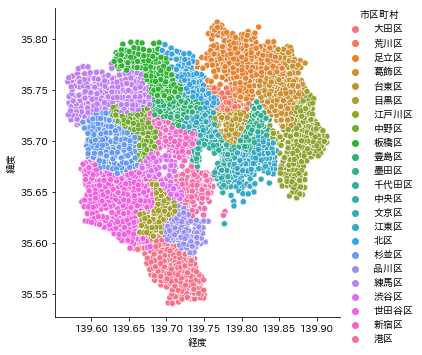

In [42]:
plt.figure(figsize=(10,10))
sns.relplot(data=df, x='経度', y='緯度', hue='市区町村')
plt.show()

In [62]:
order_mean_ward=df.groupby('市区町村').mean()['賃料'].sort_values(ascending=True).keys()
order_mean_station=df.groupby('駅').mean()['賃料'].sort_values(ascending=True).keys()

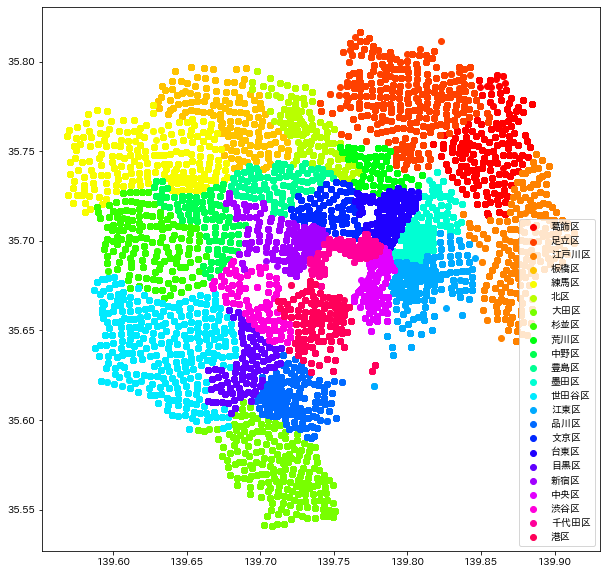

In [76]:
plt.figure(figsize=(10,10))
for id,ku in enumerate(order_mean_ward):
    plt.scatter(df.loc[df['市区町村']==ku,'経度'], df.loc[df['市区町村']==ku, '緯度'], color=cm.hsv(id/len(order_mean_ward)), label=ku)
    plt.legend()
    
plt.show()

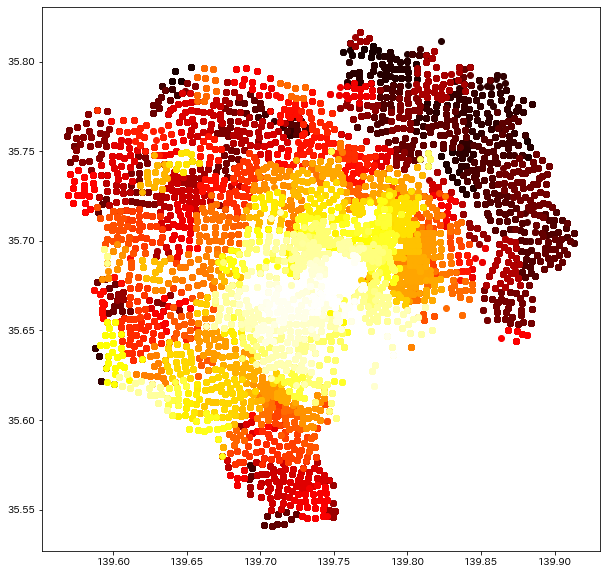

In [64]:
plt.figure(figsize=(10,10))
for id,eki in enumerate(order_mean_station):
    plt.scatter(df.loc[df['駅']==eki,'経度'], df.loc[df['駅']==eki, '緯度'], color=cm.hot(id/len(order_mean_station)))
    
plt.show()

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


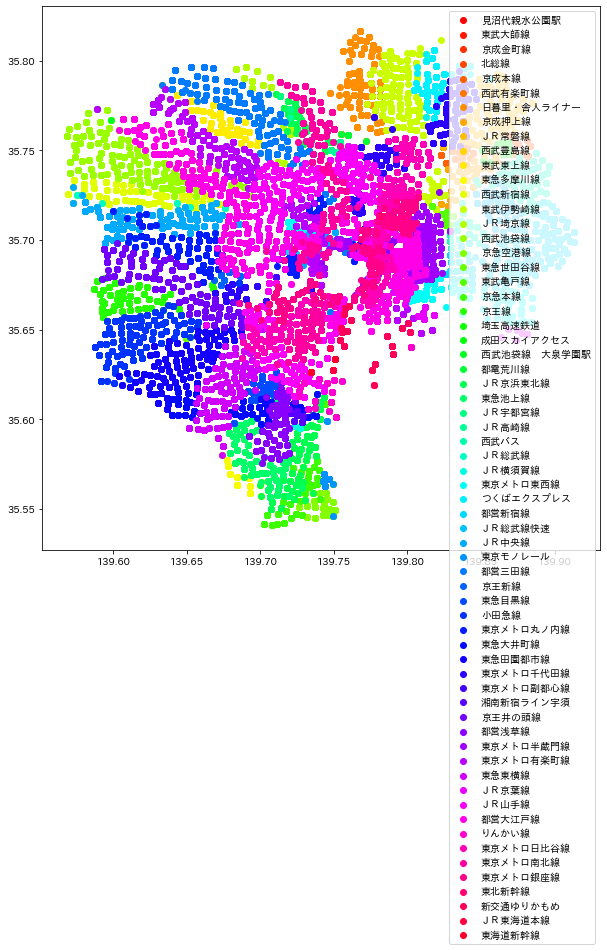

In [77]:
order_mean_line=df.groupby('路線').mean()['賃料'].sort_values(ascending=True).keys()
plt.figure(figsize=(10,10))
for id,line in enumerate(order_mean_line):
    plt.scatter(df.loc[df['路線']==line,'経度'], df.loc[df['路線']==line, '緯度'], color=cm.hsv(id/len(order_mean_line)), label=line)
    plt.legend()
    
plt.show()

In [69]:
order_mean_station[440:478]

Index(['目黒駅', '北参道駅', '豊洲駅', '参宮橋駅', '渋谷駅', '有明テニスの森駅', '青山一丁目駅', '高輪台駅',
       '学習院下駅', 'お台場海浜公園駅', '赤坂駅', '麻布十番駅', '広尾駅', '半蔵門駅', '代々木公園駅', '溜池山王駅',
       'テレコムセンター駅', '麹町駅', '竹芝駅', '赤坂見附駅', '原宿駅', '虎ノ門駅', '乃木坂駅', '神谷町駅',
       '代官山駅', '大門駅', '六本木駅', '外苑前駅', '明治神宮前駅', '新豊洲駅', '永田町駅', '表参道駅', '大手町駅',
       '銀座一丁目駅', '汐留駅', '内幸町駅', '六本木一丁目駅', '有明駅'],
      dtype='object', name='駅')

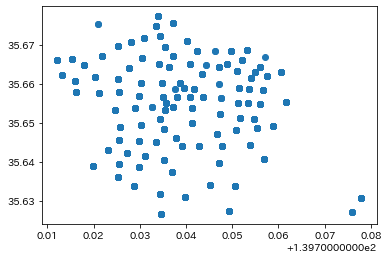

In [38]:
plt.scatter(df.loc[df['市区町村']=='港区','経度'], df.loc[df['市区町村']=='港区', '緯度'])
plt.show()

In [60]:
df.iloc[0]

カテゴリ                                                 賃貸アパート
建物名                                                 プチ・ボヌール
経度                                               139.726883
緯度                                                 35.55423
都道府県                                                    東京都
市区町村                                                    大田区
市区町村以下                                                 南蒲田３
経度(区)                                            139.716293
緯度(区)                                             35.561337
路線                                                    京急空港線
駅                                                       糀谷駅
経度(駅)                                            139.730637
緯度(駅)                                             35.554943
歩                                                         7
バス                                                        0
車                                                         0
築年数                                     